In [1]:
## TASK 1: Load & Clean the Data

import pandas as pd

# Load Dataset
df = pd.read_csv("customer_signups.csv")

# Quick look at the data
df.info()
display(df.describe(include="all"))
df.head(5)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       298 non-null    object
 1   name              291 non-null    object
 2   email             266 non-null    object
 3   signup_date       298 non-null    object
 4   source            291 non-null    object
 5   region            270 non-null    object
 6   plan_selected     292 non-null    object
 7   marketing_opt_in  290 non-null    object
 8   age               288 non-null    object
 9   gender            292 non-null    object
dtypes: object(10)
memory usage: 23.6+ KB


,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
count,298,291,266,298,291,270,292,290,288,292
unique,298,291,265,295,7,5,8,3,11,7
top,CUST00299,Mr. Bruce Bridges,lisa11@mailhub.org,not a date,YouTube,North,Premium,No,40,Other
freq,1,1,2,4,58,65,57,156,50,59


,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaN,Instagram,NaN,basic,No,34,Female
1,CUST00001,Nicole Stewart,nicole1@example.com,02-01-24,LinkedIn,West,basic,Yes,29,Male
2,CUST00002,Rachel Allen,rachel2@example.com,03-01-24,Google,North,PREMIUM,Yes,34,Non-Binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,04-01-24,YouTube,NaN,Pro,No,40,Male
4,CUST00004,NaN,matthew4@mailhub.org,05-01-24,LinkedIn,West,Premium,No,25,Other


In [2]:
## TASK 1: Load & Clean the Data
# Clean the Data
# Check missing values
df.isnull().sum()

customer_id          2
name                 9
email               34
signup_date          2
source               9
region              30
plan_selected        8
marketing_opt_in    10
age                 12
gender               8
dtype: int64

In [3]:
## TASK 1: Load & Clean the Data

## Identify missing values, data types, and column structure

# Fill or drop missing values where appropriate

df["region"] = df["region"].fillna("Unknown")

# Replace empty strings, NaN, and 'UnknownPlan' with 'Unknown Plan'

df['plan_selected'] = df['plan_selected'].replace(['', 'UnknownPlan'], 'Unknown Plan')
df['plan_selected'] = df['plan_selected'].fillna('Unknown Plan')
df['plan_selected'].value_counts()


plan_selected
Premium         57
Pro             53
basic           46
Basic           46
PREMIUM         42
PRO             41
Unknown Plan    14
prem             1
Name: count, dtype: int64

In [4]:
## TASK 1: Load & Clean the Data

# Print the signup_date column

print(df["signup_date"])

0           NaN
1      02-01-24
2      03-01-24
3      04-01-24
4      05-01-24
         ...   
295    22-10-24
296    23-10-24
297    24-10-24
298    25-10-24
299    26-10-24
Name: signup_date, Length: 300, dtype: object


In [5]:
## TASK 1: Load & Clean the Data

# Convert signup_date to datetime

# Convert signup_date to datetime, coercing errors
df["signup_date"] = pd.to_datetime(df["signup_date"], format="%d-%m-%y", errors="coerce")

# Print the signup_date column
print(df["signup_date"])



0            NaT
1     2024-01-02
2     2024-01-03
3     2024-01-04
4     2024-01-05
         ...    
295   2024-10-22
296   2024-10-23
297   2024-10-24
298   2024-10-25
299   2024-10-26
Name: signup_date, Length: 300, dtype: datetime64[ns]


In [6]:
## TASK 1: Load & Clean the Data
# Again Printing signup_date column to see changes

print(df["signup_date"])

0            NaT
1     2024-01-02
2     2024-01-03
3     2024-01-04
4     2024-01-05
         ...    
295   2024-10-22
296   2024-10-23
297   2024-10-24
298   2024-10-25
299   2024-10-26
Name: signup_date, Length: 300, dtype: datetime64[ns]


In [7]:
## TASK 1: Load & Clean the Data

# Standardise inconsistent text values (plan_selected, gender, etc.)
# Standardize text values (strip spaces, title case)

df["plan_selected"] = df["plan_selected"].str.strip().str.title()
df["gender"] = df["gender"].str.strip().str.title()
df["source"] = df["source"].str.strip().str.title()
df["region"] = df["region"].str.strip().str.title()
print("\nAfter standardizing text columns:\n", df[["plan_selected", "gender", "source", "region"]])


After standardizing text columns:
     plan_selected      gender     source   region
0           Basic      Female  Instagram  Unknown
1           Basic        Male   Linkedin     West
2         Premium  Non-Binary     Google    North
3             Pro        Male    Youtube  Unknown
4         Premium       Other   Linkedin     West
..            ...         ...        ...      ...
295       Premium         NaN     Google     West
296         Basic      Female     Google  Central
297         Basic         NaN  Instagram     West
298       Premium        Male    Youtube    South
299       Premium        Male        NaN    North

[300 rows x 4 columns]


In [8]:
## TASK 1: Load & Clean the Data

# Remove duplicate rows based on customer_id
# Remove duplicate customer_id

# Identify duplicate customer IDs
duplicates = df[df.duplicated(subset=["customer_id"], keep=False)]

# Display the duplicate customer IDs
print("Duplicate customer IDs:")
print(duplicates[["customer_id"]])

# There is no Duplicate Record of Customer_id


Duplicate customer IDs:
    customer_id
161         NaN
287         NaN


In [34]:
## TASK 1: Load & Clean the Data

## Handle missing values

df["region"] = df["region"].fillna("Unknown Region")
df["email"] = df["email"].fillna("Missing Email")
df["source"] = df["source"].fillna("Unknown source")
df["name"] = df["name"].fillna("Missing Name")
df["gender"] = df["gender"].fillna("Missing")

# Replace 123 in Column gender with "Unknown Gender"

df["gender"] = df["gender"].replace("123", "Missing")

gender_counts = df["gender"].value_counts()

print("\nCount of each gender:")
print(gender_counts)
print("\nAfter handling missing values:\n", df)



Count of each gender:
gender
Female        92
Male          92
Other         59
Non-binary    42
Missing       14
Name: count, dtype: int64

After handling missing values:
     customer_id                name                  email signup_date  \
0     CUST00000       Joshua Bryant          Missing Email         NaT   
1     CUST00001      Nicole Stewart    nicole1@example.com  2024-01-02   
2     CUST00002        Rachel Allen    rachel2@example.com  2024-01-03   
3     CUST00003     Zachary Sanchez   zachary3@mailhub.org  2024-01-04   
4     CUST00004        Missing Name   matthew4@mailhub.org  2024-01-05   
..          ...                 ...                    ...         ...   
295   CUST00295          Gary Smith     gary95@example.com  2024-10-22   
296   CUST00296     Anthony Roberts  anthony96@mailhub.org  2024-10-23   
297   CUST00297  Timothy Mclaughlin          Missing Email  2024-10-24   
298   CUST00298     Justin Mcintyre   justin98@mailhub.org  2024-10-25   
299   CUST00

In [10]:
## TASK 1: Load & Clean the Data

# Convert age to numeric, invalid entries become NaN

df["age"] = pd.to_numeric(df["age"], errors="coerce")


In [11]:
## TASK 1: Load & Clean the Data

# Check for outliers in age

print("\nAge statistics:\n", df["age"].describe())


Age statistics:
 count    281.000000
mean      36.135231
std       14.986048
min       21.000000
25%       25.000000
50%       34.000000
75%       40.000000
max      206.000000
Name: age, dtype: float64


In [12]:
## TASK 2 : Data Quality Summary

# Count of missing values per column

missing_count = df.isnull().sum()
print("Missing values per column:\n", missing_count)

Missing values per column:
 customer_id          2
name                 0
email                0
signup_date          7
source               0
region               0
plan_selected        0
marketing_opt_in    10
age                 19
gender               0
dtype: int64


In [13]:
## TASK 2 : Data Quality Summary

# Percentage of missing values

missing_percent = (df.isnull().sum() / len(df)) * 100
print("\n% of missing values per column:\n", missing_percent.round(2))


% of missing values per column:
 customer_id         0.67
name                0.00
email               0.00
signup_date         2.33
source              0.00
region              0.00
plan_selected       0.00
marketing_opt_in    3.33
age                 6.33
gender              0.00
dtype: float64


In [14]:
## TASK 2 : Data Quality Summary

## Number of Duplicates Removed

# Before any cleaning
df_original = df.copy()
initial_duplicates = df_original.duplicated(subset=["customer_id"]).sum()

# Remove duplicates
df = df.drop_duplicates(subset=["customer_id"])

# Number of duplicates removed
print("Number of duplicate customer_id removed:", initial_duplicates)

Number of duplicate customer_id removed: 1


In [15]:
## TASK 2 : Data Quality Summary

# Check unique values before cleaning

print("Before Cleaning:")
print("plan_selected:", df["plan_selected"].unique())
print("gender:", df["gender"].unique())
print("source:", df["source"].unique())
print("region:", df["region"].unique())

Before Cleaning:
plan_selected: ['Basic' 'Premium' 'Pro' 'Unknown Plan']
gender: ['Female' 'Male' 'Non-Binary' 'Other' 'Missing']
source: ['Instagram' 'Linkedin' 'Google' 'Youtube' 'Facebook' 'Referral'
 'Unknown source' '??']
region: ['Unknown' 'West' 'North' 'South' 'Central' 'East']


In [16]:
## TASK 2 : Data Quality Summary

## Mention inconsistent category values corrected (e.g., PRO → Pro)
# --- Clean categorical values ---
# 1. Convert everything to lowercase (or title case for names)
# .capitalize() → only first letter of the string uppercase / .title() → first letter of every word uppercase

df["plan_selected"] = df["plan_selected"].str.strip().str.title()   # e.g. " pro " → "Pro"
df["gender"] = df["gender"].str.strip().str.capitalize()           # e.g. "male" → "Male"
df["source"] = df["source"].str.strip().str.title()                # e.g. "google" → "Google"
df["region"] = df["region"].str.strip().str.title()

In [17]:
## TASK 2 : Data Quality Summary

# Check unique values after cleaning

print("\nAfter Cleaning:")
print("plan_selected:", df["plan_selected"].unique())
print("gender:", df["gender"].unique())
print("source:", df["source"].unique())
print("region:", df["region"].unique())


After Cleaning:
plan_selected: ['Basic' 'Premium' 'Pro' 'Unknown Plan']
gender: ['Female' 'Male' 'Non-binary' 'Other' 'Missing']
source: ['Instagram' 'Linkedin' 'Google' 'Youtube' 'Facebook' 'Referral'
 'Unknown Source' '??']
region: ['Unknown' 'West' 'North' 'South' 'Central' 'East']


In [18]:
## TASK 3: Summary Outputs (Using Pandas Aggregations)

# Using .groupby() or .value_counts() to summarise:

# --- 1. Sign-ups per Week ---


signups_per_week = df.groupby(pd.Grouper(key="signup_date", freq="W"))["customer_id"].count()
print("Sign-ups per Week:\n", signups_per_week, "\n")



Sign-ups per Week:
 signup_date
2024-01-07    6
2024-01-14    7
2024-01-21    7
2024-01-28    7
2024-02-04    7
2024-02-11    7
2024-02-18    7
2024-02-25    7
2024-03-03    7
2024-03-10    7
2024-03-17    7
2024-03-24    6
2024-03-31    6
2024-04-07    7
2024-04-14    7
2024-04-21    7
2024-04-28    7
2024-05-05    6
2024-05-12    7
2024-05-19    7
2024-05-26    7
2024-06-02    7
2024-06-09    6
2024-06-16    6
2024-06-23    7
2024-06-30    7
2024-07-07    7
2024-07-14    7
2024-07-21    6
2024-07-28    7
2024-08-04    7
2024-08-11    6
2024-08-18    7
2024-08-25    7
2024-09-01    7
2024-09-08    7
2024-09-15    7
2024-09-22    7
2024-09-29    7
2024-10-06    7
2024-10-13    7
2024-10-20    6
2024-10-27    6
Name: customer_id, dtype: int64 



In [19]:
## TASK 3: Summary Outputs (Using Pandas Aggregations)

# --- 2. Sign-ups by source, region, and plan_selected ---

signups_by_source = df["source"].value_counts()
signups_by_region = df["region"].value_counts()
signups_by_plan = df["plan_selected"].value_counts()

In [20]:
## TASK 3: Summary Outputs (Using Pandas Aggregations)

print("Sign-ups by Source:\n", signups_by_source, "\n")
print("Sign-ups by Region:\n", signups_by_region, "\n")
print("Sign-ups by Plan:\n", signups_by_plan, "\n")


Sign-ups by Source:
 source
Youtube           58
Google            50
Referral          49
Instagram         48
Facebook          40
Linkedin          39
Unknown Source     9
??                 6
Name: count, dtype: int64 

Sign-ups by Region:
 region
North      65
East       61
South      59
West       45
Central    39
Unknown    30
Name: count, dtype: int64 

Sign-ups by Plan:
 plan_selected
Premium         99
Pro             94
Basic           92
Unknown Plan    14
Name: count, dtype: int64 



In [21]:
## TASK 3: Summary Outputs (Using Pandas Aggregations)

# Replace ?? with blank in source column
df["source"] = df["source"].replace('??','Unknown Source')

# Check unique values after replacement
print(df["source"].unique())

['Instagram' 'Linkedin' 'Google' 'Youtube' 'Facebook' 'Referral'
 'Unknown Source']


In [22]:
## TASK 3: Summary Outputs (Using Pandas Aggregations)

# --- 2. Sign-ups by source, region, and plan_selected ---

signups_by_source = df["source"].value_counts()
print("Sign-ups by Source:\n", signups_by_source, "\n")

Sign-ups by Source:
 source
Youtube           58
Google            50
Referral          49
Instagram         48
Facebook          40
Linkedin          39
Unknown Source    15
Name: count, dtype: int64 



In [23]:
## TASK 3: Summary Outputs (Using Pandas Aggregations)

# --- 3. Marketing opt-in counts by gender ---

marketing_optin = df.groupby(["gender", "marketing_opt_in"])["customer_id"].count()
print("Marketing Opt-in Counts by Gender:\n", marketing_optin, "\n")

Marketing Opt-in Counts by Gender:
 gender      marketing_opt_in
Female      No                  47
            Yes                 44
Male        Nil                  1
            No                  50
            Yes                 37
Missing     No                   7
            Yes                  7
Non-binary  No                  20
            Yes                 19
Other       No                  32
            Yes                 24
Name: customer_id, dtype: int64 



In [24]:
## TASK 3: Summary Outputs (Using Pandas Aggregations)

# --- 4. Age Summary (min, max, mean, median, null count) ---

age_summary = {
    "min": int(df["age"].min()),
    "max": int(df["age"].max()),
    "mean": round(float(df["age"].mean()), 2),
    "median": float(df["age"].median()),
    "null_count": int(df["age"].isnull().sum())
}
print("Age Summary:\n", age_summary)

Age Summary:
 {'min': 21, 'max': 206, 'mean': 36.17, 'median': 34.0, 'null_count': 19}


In [25]:
## TASK 3: Summary Outputs (Using Pandas Aggregations)

## Handling the Age outlier 206
# Replace outliers with median age

median_age = df["age"].median()

# replacing age outside 15–100 with median age:
df.loc[(df["age"] < 15) | (df["age"] > 100), "age"] = median_age

# Recalculate summary

age_summary = {
    "min": int(df["age"].min()),
    "max": int(df["age"].max()),
    "mean": round(float(df["age"].mean()), 2),
    "median": float(df["age"].median()),
    "null_count": int(df["age"].isnull().sum())
}
print(age_summary)

{'min': 21, 'max': 60, 'mean': 35.56, 'median': 34.0, 'null_count': 19}


In [26]:
## TASK 4: Answer These Business Questions

# 1. Which acquisition source brought in the most users last month?

df_last_month = df[df["signup_date"].dt.month == df["signup_date"].dt.month.max()]
df_last_month["source"].value_counts().idxmax()

'Google'

In [27]:
## TASK 4: Answer These Business Questions

# 2. Which region shows most missing/incomplete data?
# Count values including missing/unknown

region_counts = df['region'].value_counts(dropna=False)
print(region_counts)


region
North      65
East       61
South      59
West       45
Central    39
Unknown    30
Name: count, dtype: int64


In [28]:
## TASK 4: Answer These Business Questions

# Identify regions with missing or 'Unknown' values

missing_regions = region_counts[region_counts.index.isin(['Unknown']) | region_counts.index.isnull()]
print("Regions with missing or incomplete data:", missing_regions)

Regions with missing or incomplete data: region
Unknown    30
Name: count, dtype: int64


In [29]:
## TASK 4: Answer These Business Questions

# 3. Are older users more or less likely to opt in to marketing?
# Compare average age of users who opted in vs not

avg_age_optin = df.groupby('marketing_opt_in')['age'].mean()
print(avg_age_optin)

# calculates the average age for users who opted in (Yes) vs not (No).
## We can then compare the numbers:

# If the average age of Yes < No → older users are less likely to opt in

# If average age of Yes > No → older users are more likely to opt in
## Answer - From this, we see that older users are slightly more likely to opt in to marketing than those who said No, though the difference is small.

marketing_opt_in
Nil    25.000000
No     35.312925
Yes    36.098361
Name: age, dtype: float64


In [30]:
## TASK 4: Answer These Business Questions

# 4. Which plan is most commonly selected, and by which age group?
# Most common plan

most_common_plan = df['plan_selected'].value_counts().idxmax()

print(df['plan_selected'].value_counts())

plan_count = df['plan_selected'].value_counts().max()

# Create age groups

bins = [15, 25, 35, 45, 55, 65, 100]
labels = ['16-25','26-35','36-45','46-55','56-65','66-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Most common age group for this plan

age_group_mode = df[df['plan_selected'] == most_common_plan]['age_group'].mode()[0]

# Print result

print(f"Most common plan: {most_common_plan} ({plan_count} users), Most common age group: {age_group_mode}")

plan_selected
Premium         99
Pro             94
Basic           92
Unknown Plan    14
Name: count, dtype: int64
Most common plan: Premium (99 users), Most common age group: 26-35


In [31]:
## TASK 5: (Optional Stretch Task - Support Tickets)

# Load the support dataset

support = pd.read_csv("support_tickets.csv")

# Merge with signup data- 
# Joins the main dataset frame (df) with the support tickets dataset (support) based on customer_id.
# how ="left" ensures all users from df are kept, even if they have no support tickets.
merged = df.merge(support, on="customer_id", how="left")

# Days to support contact

merged["ticket_date"] = pd.to_datetime(merged["ticket_date"])
merged["days_to_support"] = (merged["ticket_date"] - merged["signup_date"]).dt.days

# Customers contacting support within 2 weeks

support_within_2w = merged[merged["days_to_support"] <= 14]

# Support summary by plan and region

support_summary = support_within_2w.groupby(["plan_selected", "region"])["customer_id"].count()
support_summary

plan_selected  region 
Basic          Central    2
               East       4
               North      2
               South      8
               Unknown    1
               West       4
Premium        Central    4
               North      4
               West       6
Pro            Central    2
               East       6
               North      9
               South      3
               Unknown    3
               West       3
Unknown Plan   East       1
               North      3
Name: customer_id, dtype: int64

In [32]:
## TASK 5: (Optional Stretch Task - Support Tickets)

# 5th ques of TASK 4 (Optional) Which plan’s users are most likely to contact support?

# Total support contacts per plan

support_per_plan = support_within_2w.groupby("plan_selected")["customer_id"].count()
print(support_per_plan)

# Plan with the most support contacts

top_support_plan = support_per_plan.idxmax()
top_support_count = support_per_plan.max()

print(f"Plan most likely to contact support: {top_support_plan} ({top_support_count} users contacted support within 2 weeks)")


plan_selected
Basic           21
Premium         14
Pro             26
Unknown Plan     4
Name: customer_id, dtype: int64
Plan most likely to contact support: Pro (26 users contacted support within 2 weeks)


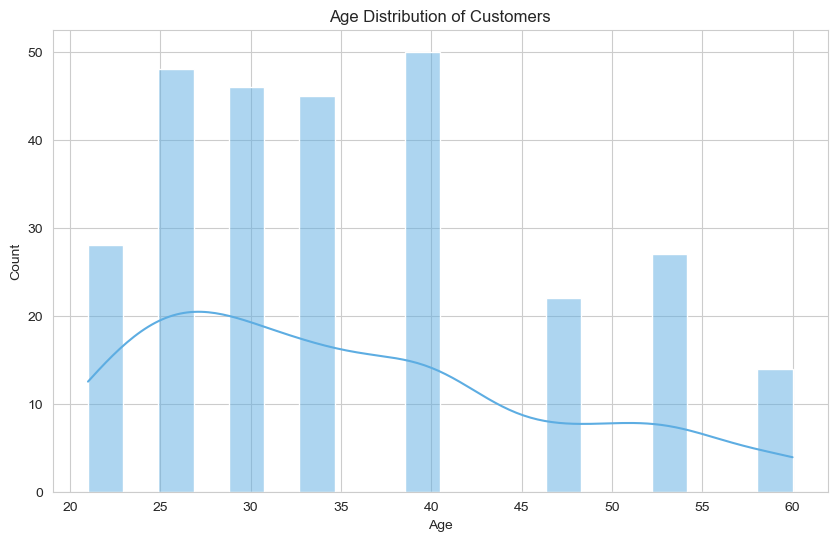

age
21.0    28
25.0    48
29.0    46
34.0    45
40.0    50
47.0    22
53.0    27
60.0    14
Name: count, dtype: int64


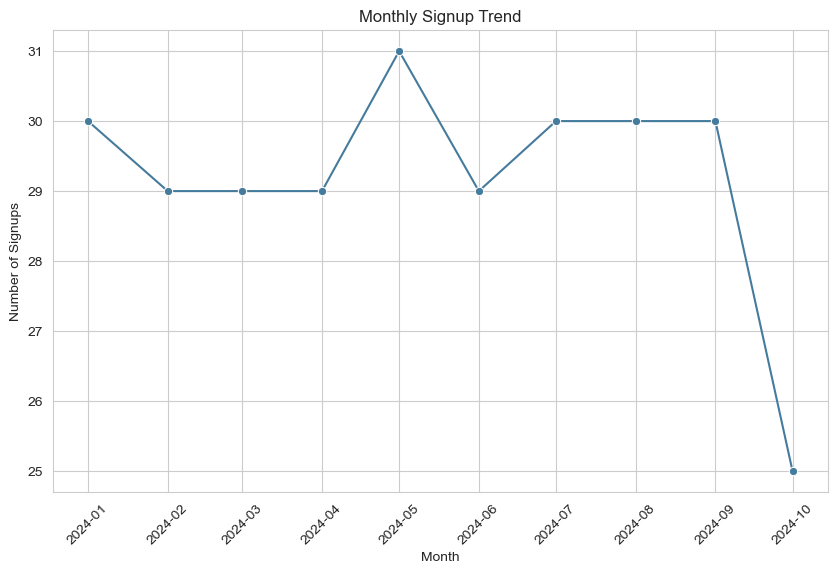

  signup_month  count
0   2024-01-01     30
1   2024-02-01     29
2   2024-03-01     29
3   2024-04-01     29
4   2024-05-01     31
5   2024-06-01     29
6   2024-07-01     30
7   2024-08-01     30
8   2024-09-01     30
9   2024-10-01     25


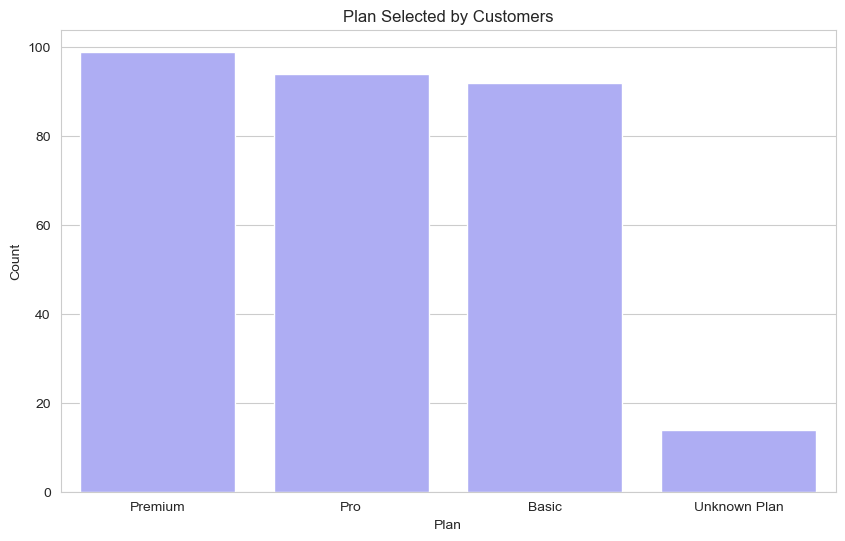

plan_selected
Premium         99
Pro             94
Basic           92
Unknown Plan    14
Name: count, dtype: int64


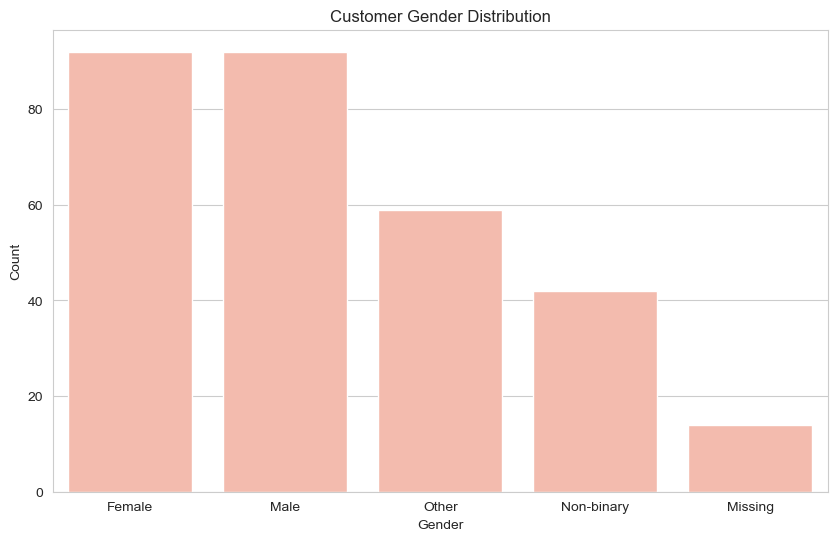

gender
Female        92
Male          92
Other         59
Non-binary    42
Missing       14
Name: count, dtype: int64


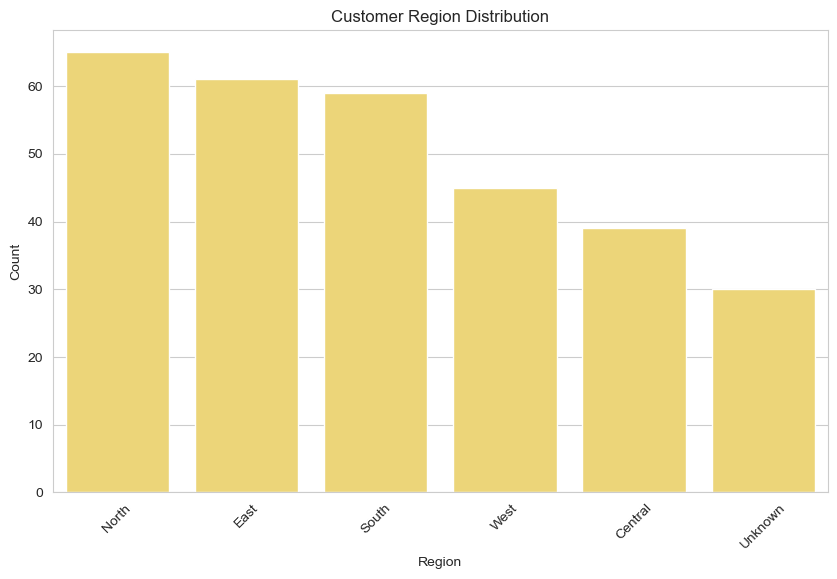

region
North      65
East       61
South      59
West       45
Central    39
Unknown    30
Name: count, dtype: int64


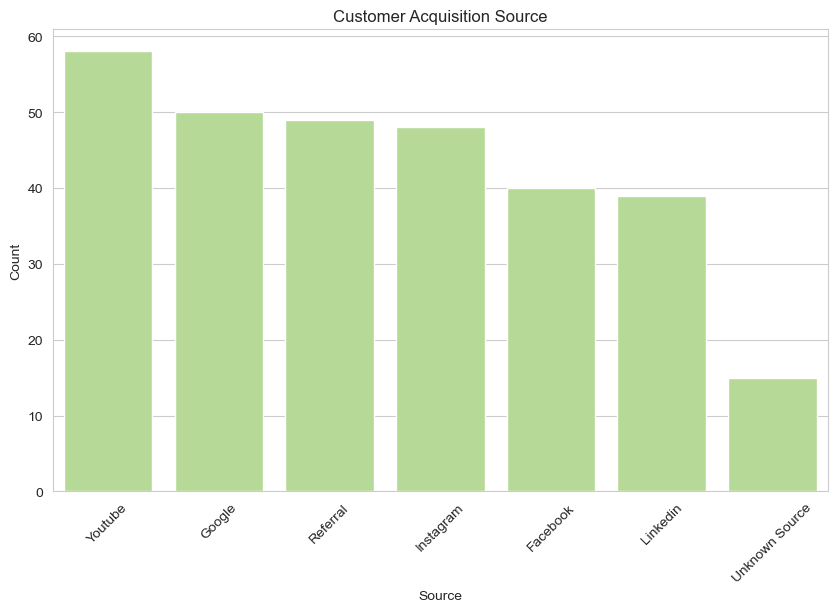

source
Youtube           58
Google            50
Referral          49
Instagram         48
Facebook          40
Linkedin          39
Unknown Source    15
Name: count, dtype: int64


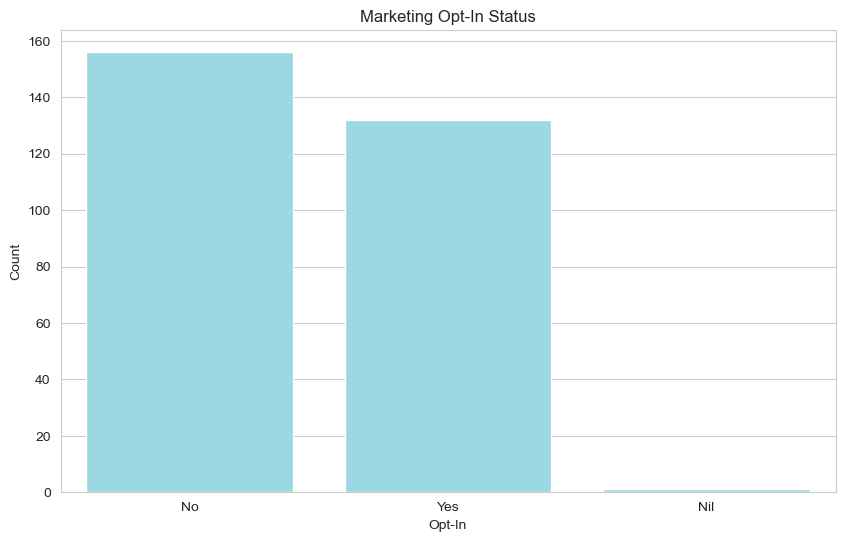

marketing_opt_in
No     156
Yes    132
Nil      1
Name: count, dtype: int64


In [33]:
#####################################################################################

## Graphical Visualizations for Customer Sign-Up Behaviour & Data Quality Audit

#####################################################################################

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# Define a coordinated soothing color palette
pastel_colors = {
    "age": "#5DADE2",           # blue
    "signup_trend": "#457B9D",  # soft teal
    "plan": "#A3A1FF",          # soft purple
    "gender": "#FFB4A2",        # light coral
    "region": "#FFE066",        # soft yellow
    "source": "#B5E48C",        # light green
    "marketing": "#90E0EF"      # soft cyan
}

# -------------------------------
# 1. Age Distribution
# -------------------------------
plt.figure()
sns.histplot(df["age"], bins=20, kde=True, color=pastel_colors["age"])
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
print(df["age"].value_counts().sort_index().head(20))  # first 20 ages

# -------------------------------
# 2. Monthly Signup Trend
# -------------------------------
if 'signup_date' in df.columns:
    df['signup_month'] = df['signup_date'].dt.to_period('M')
    signup_trend = df.groupby('signup_month').size().reset_index(name='count')
    signup_trend['signup_month'] = signup_trend['signup_month'].dt.to_timestamp() 
    
    plt.figure()
    sns.lineplot(data=signup_trend, x='signup_month', y='count', marker='o', color=pastel_colors["signup_trend"])
    plt.title("Monthly Signup Trend")
    plt.xlabel("Month")
    plt.ylabel("Number of Signups")
    plt.xticks(rotation=45)
    plt.show()
    print(signup_trend)

# -------------------------------
# 3. Plan Selected Distribution
# -------------------------------
plt.figure()
sns.countplot(data=df, x='plan_selected', order=df['plan_selected'].value_counts().index, color=pastel_colors["plan"])
plt.title("Plan Selected by Customers")
plt.xlabel("Plan")
plt.ylabel("Count")
plt.show()
print(df["plan_selected"].value_counts())

# -------------------------------
# 4. Gender Distribution
# -------------------------------
plt.figure()
sns.countplot(data=df, x='gender', order=df['gender'].value_counts().index, color=pastel_colors["gender"])
plt.title("Customer Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()
print(df["gender"].value_counts())


# -------------------------------
# 5. Region Distribution
# -------------------------------
plt.figure()
sns.countplot(data=df, x='region', order=df['region'].value_counts().index, color=pastel_colors["region"])
plt.title("Customer Region Distribution")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
print(df["region"].value_counts())

# -------------------------------
# 6. Source Distribution
# -------------------------------
plt.figure()
sns.countplot(data=df, x='source', order=df['source'].value_counts().index, color=pastel_colors["source"])
plt.title("Customer Acquisition Source")
plt.xlabel("Source")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
print(df["source"].value_counts())


# -------------------------------
# 7. Marketing Opt-In
# -------------------------------
plt.figure()
sns.countplot(data=df, x='marketing_opt_in', order=df['marketing_opt_in'].value_counts().index, color=pastel_colors["marketing"])
plt.title("Marketing Opt-In Status")
plt.xlabel("Opt-In")
plt.ylabel("Count")
plt.show()
print(df["marketing_opt_in"].value_counts())

